In [1]:

#import libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import initializers
from keras.utils.generic_utils import get_custom_objects

import pandas as pd

In [4]:
val2_1=[]
Rges=[]

#here we just show the code for N=10
#the code for N>10 is used in the same way, just use needed K, l1 and N
l1=np.array([10,15,20,25,30,35,40,45,50,60,70,80,90,100,150,200,250,350,500,750,1000])


for i in range(100):
    val1=[]
    print(i)
    R1=[]
    for K in l1:
    
        N=l1[0]
        M=1
        
        # define matrices to evaluate Equation 13 of the paper
        
        kernel_initializer=initializers.RandomNormal(stddev=1.,mean=0)
        s=kernel_initializer((K,N)).numpy()
        for i in range(len(s)):
    
            s[i]=s[i]/np.linalg.norm(s[i])*np.sqrt(N)
    
        kernel_initializer=initializers.RandomNormal(stddev=1.,mean=0)
        t=kernel_initializer((M,N)).numpy()
        for n in range(M):
    
            t[n]=t[n]/np.linalg.norm(t[n])*np.sqrt(N)

        Q=[]
        for i in range(K):
            for j in range(K):
                if i==j:
                    Q.append(1)
                else:
        
                    Q.append(np.arcsin(np.matmul(s[i],s[j])/(2*N)))
            
        Q=np.array(Q).reshape(K,K)
    
        R=[]
        for i in range(K):
            for n in range(M):
            
                R.append(np.arcsin(np.matmul(s[i],t[n])/(2*N)))
        R=np.array(R)
        R1.append(R)
        

    
        z2=[]
        for i in range(K):
            z2.append(np.pi/6-1)
        I2=np.diag(z2,k=0)
    
    
        S=Q+I2
        A=np.linalg.inv(S)  

        c=np.matmul(A,R)
    
    
        val1.append(np.matmul(c.T,R))
    
    
    
    val2_1.append(np.array(val1))
    Rges.append(np.array(R1))
val2_1=np.array(val2_1)
eg=(np.array(np.pi/6-np.array(val2_1))/(np.pi))
std1=np.std(np.array(eg),axis=0)
mean1=np.mean(np.array(eg),axis=0)


0


<ipython-input-4-b57161a23ecc>:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Rges.append(np.array(R1))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [12]:
d1=(np.array(np.pi/6-np.array(val2_6))/(np.pi))
e1=(np.array(l1))

In [24]:
#define plateau given by Equation 19 of the paper

eg=[]
for i in range(len(mean1)):
    eg.append(0.0075)

In [91]:
#dfextra=pd.DataFrame({"mean": mean1,
             #         "std": std1,
              #        "K": l1})


In [92]:
#dfextra.to_csv("extra_values_different_ini_num_100.csv",sep=";",header=None)

In [65]:
#save as csv
df={"mean": np.array([mean1,mean3,mean4,mean5,mean6]),
   "std": np.array([std1,std3,std4,std5,std6]),
    "K": np.array([l1,l3,l4,l5,l6])}


In [66]:
dfmean=pd.DataFrame(df["mean"])
dfstd=pd.DataFrame(df["std"])
dfK=pd.DataFrame(df["K"])

In [67]:
# save different runs

#dfmean.to_csv("mean_values_different_ini_num.csv",sep=";",header=None)
#dfstd.to_csv("std_values_different_ini_num.csv",sep=";",header=None)
#dfK.to_csv("K_values_different_ini_num.csv",sep=";",header=None)

In [10]:
# upload results from previous runs

dfmean=pd.read_csv("mean_values_different_ini_num.csv",sep=";",header=None)
dfstd=pd.read_csv("std_values_different_ini_num.csv",sep=";",header=None)
dfK=pd.read_csv("K_values_different_ini_num.csv",sep=";",header=None)

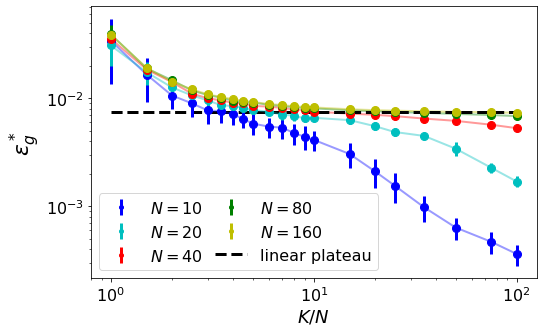

In [84]:
fig=plt.figure(figsize=(8,5))
plt.xlabel(r"$K/N$",size=18)
plt.ylabel(r"$\epsilon_g^*$",size=22)
plt.yscale("log")
plt.xscale("log")

plt.errorbar(np.array(l1)/l1[0],mean1,std1,linewidth=2,fmt='o',markersize=8,elinewidth=3,color="b")
plt.plot(np.array(l1)/l1[0],mean1,linewidth=2,alpha=0.4,color="b",label='_nolegend_')

plt.errorbar(np.array(l3)/l3[0],dfmean.values[1][1:],dfstd.values[1][1:],linewidth=3,fmt='o',markersize=8,color="c")
plt.plot(np.array(l3)/l3[0],dfmean.values[1][1:],linewidth=2,alpha=0.4,label='_nolegend_',color="c")

plt.errorbar(np.array(l4)/l4[0],dfmean.values[2][1:],dfstd.values[2][1:],linewidth=3,fmt='o',markersize=8,color="r")
plt.plot(np.array(l4)/l4[0],dfmean.values[2][1:],linewidth=2,alpha=0.4,label='_nolegend_',color="r",zorder=-8)

plt.errorbar(np.array(l5)/l5[0],dfmean.values[3][1:],dfstd.values[3][1:],linewidth=3,fmt='o',markersize=8,color="g")
plt.plot(np.array(l5)/l5[0],dfmean.values[3][1:],linewidth=2,alpha=0.4,label='_nolegend_',color="g",zorder=-8)

plt.errorbar(np.array(l6)/l6[0],dfmean.values[4][1:],dfstd.values[4][1:],linewidth=3,fmt='o',markersize=8,color="y")
plt.plot(np.array(l6)/l6[0],dfmean.values[4][1:],linewidth=2,alpha=0.4,label='_nolegend_',color="y",zorder=-8)

plt.errorbar(np.array(l6)/l6[0],eg,linewidth=3,linestyle="--",color="black",zorder=-5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend([r"$N=10$",r"$N=20$","$N=40$",r"$N=80$",r"$N=160$","linear plateau"],fontsize=16,ncol=2,columnspacing=0.8,
           markerscale=0.5,loc="lower left")

#plt.savefig("eps_von_K_N_M1_matrix_ini_10_differentN_loglog4.pdf",bbox_inches="tight")
plt.show();